# SPARK Learning Platform
https://www.lucernastudios.com/

## Target Buyers

### Teachers
- Kits with 10 units
- BYOD or Oculus Go
- Control board
- Worksheets

**IN PROGRESS**

### Parents / Students
- Single devices
- BYOD or Oculus Go

**IN PROGRESS**

### Edu Centers (Libraries, Museums, Rec Centers, etc)
- Booth
- Self-contained
- Oculus Go
- Banner (Marketing, or Partner marketing)
- Kits with 2 devices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact


%matplotlib inline

In [2]:
class Banner:
    def __init__(self, initial_cost=500, recurring_cost=10, initial_revenue=200, recurring_revenue=100, start=pd.datetime(2018, 1, 1), length=6):
        self.initial_cost = initial_cost
        self.recurring_cost = recurring_cost
        self.initial_revenue = initial_revenue
        self.recurring_revenue = recurring_revenue
        self.start = start
        self.length = length    
        
    @property
    def cost(self):
        first_month = [self.initial_cost + self.recurring_cost]
        following_months = [self.recurring_cost for i in range(0, len(self.time)-1)]
        return pd.Series(first_month + following_months)
    
    @property
    def revenue(self):
        first_month = [self.initial_revenue + self.recurring_revenue]
        following_months = [self.recurring_revenue for i in range(0, len(self.time)-1)]
        return pd.Series(first_month + following_months)
        
    @property
    def recurring_net(self):
        return self.recurring_revenue - self.recurring_cost
        
    @property
    def time(self):
        return pd.date_range(self.start, freq='MS', periods=self.length).tolist()
    
    @property
    def df(self):
        return pd.DataFrame({
            'time':self.time,
            'revenue':self.revenue,
            'cost':self.cost,
            'net':self.revenue - self.cost
        })
    
b = Banner()
display(b.df)

all_time = pd.date_range(pd.datetime(2018,1,1), freq = 'MS', periods=12).tolist()


for t in all_time:
    print(b.df[b.df.time == t])
    

,time,revenue,cost,net
0,2018-01-01,300,510,-210
1,2018-02-01,100,10,90
2,2018-03-01,100,10,90
3,2018-04-01,100,10,90
4,2018-05-01,100,10,90
5,2018-06-01,100,10,90


        time  revenue  cost  net
0 2018-01-01      300   510 -210
        time  revenue  cost  net
1 2018-02-01      100    10   90
        time  revenue  cost  net
2 2018-03-01      100    10   90
        time  revenue  cost  net
3 2018-04-01      100    10   90
        time  revenue  cost  net
4 2018-05-01      100    10   90
        time  revenue  cost  net
5 2018-06-01      100    10   90
Empty DataFrame
Columns: [time, revenue, cost, net]
Index: []
Empty DataFrame
Columns: [time, revenue, cost, net]
Index: []
Empty DataFrame
Columns: [time, revenue, cost, net]
Index: []
Empty DataFrame
Columns: [time, revenue, cost, net]
Index: []
Empty DataFrame
Columns: [time, revenue, cost, net]
Index: []
Empty DataFrame
Columns: [time, revenue, cost, net]
Index: []


## Revenue per Booth

In [3]:
@interact(library_subs=(2,15,2), booth_subs=(50,200,25), booth_init=(0,300,50), stand_cost=(400,700,50))
def booth_revenue_plot(library_subs, booth_subs, booth_init, stand_cost):
    booth = Banner(
        initial_cost=stand_cost,
        recurring_cost=10,
        initial_revenue=booth_init,
        recurring_revenue=library_subs + booth_subs,
        start=pd.datetime(2018, 1, 1),
        length=9
    )
        
    time = np.array(range(0,booth.length,1))
    monthly_revenue = booth.revenue.cumsum() - booth.cost.cumsum()
    
    _ = plt.plot(time, monthly_revenue)
    plt.title('${:2.1f} Spark Learning Platform Subs\n${:3.0f} Booth Subs\n${:3.0f} Booth Down Payment\n${:3.0f} Stand Cost'.format(library_subs, booth_subs, booth_init, stand_cost))
    plt.ylabel('Revenue ($)')
    # plt.ylim(0, s.avg_sale.max() + 50)
    plt.xlabel('Months')
    plt.grid()
    plt.rcParams["figure.figsize"] = (10,5)

interactive(children=(IntSlider(value=8, description='library_subs', max=15, min=2, step=2), IntSlider(value=1…

---

# Marketing and Growth

- Traffic
 - Melrose VR Center
   - 30 walk-in students every day
   - 400 people see banner
 - Colonialtown - ASP
   - Gifted
   - Limited games
   - 400 children every day (same kids)
   - Parents pick them up every day
 - Colonial - REC Center
   - 40 kids every day (mixed recurrence)
   - 400 kids for events every week (new kids)
 - Prep Time Education
   - 20 new kids every month (per school)
   - 2 new schools per month (total of 10)

In [53]:
class Ad:
    def __init__(self, impressions=10, conversion_rate=0.1, cycle=3, start=pd.datetime(2018, 1, 1), length=6):
        self._impressions = impressions
        self.conversion_rate = conversion_rate
        self.cycle = cycle
        self.start = start
        self.length = length
        
    @property
    def impressions(self):
        months = [(self._impressions if not (i%self.cycle) else 0 ) for i in range(0, len(self.time))]
        return pd.Series(months)

    @property
    def conversions(self):
        return self.impressions * self.conversion_rate

    @property
    def date_range(self):
        return pd.date_range(self.start, freq='MS', periods=self.length).tolist()

    @property
    def df(self):
        return pd.DataFrame({
            'time':self.time,
            'impressions':self.impressions,
            'conversions':self.conversions,
        })

## Campaigns

In [45]:
campaigns = {
    'prep_time_ed_round1' : Ad(impressions=20, conversion_rate=0.10, cycle=3, start=pd.datetime(2018,1,1), length=12),
    'prep_time_ed_round2' : Ad(impressions=20*3, conversion_rate=0.10, cycle=3, start=pd.datetime(2018,3,1), length=9),
    'prep_time_ed_round3' : Ad(impressions=20*6, conversion_rate=0.10, cycle=3, start=pd.datetime(2018,6,1), length=6),
    'melrose_vr_room' : Ad(impressions=20*7*4, conversion_rate=0.05, cycle=1, start=pd.datetime(2018,1,1), length=12),
    'melrose_vr_display' : Ad(impressions=400*7*4, conversion_rate=0.02, cycle=1, start=pd.datetime(2018,1,1), length=12),
    'colonialtown_rec_daily' : Ad(impressions=40*7*4, conversion_rate=0.10, cycle=1, start=pd.datetime(2018,1,1), length=12),
    'colonialtown_rec_events' : Ad(impressions=400*4, conversion_rate=0.10, cycle=1, start=pd.datetime(2018,1,1), length=12),
    'colonial_asp' : Ad(impressions=400, conversion_rate=0.20, cycle=6, start=pd.datetime(2018,1,1), length=12),
    # 'FETC' : Ad(impressions=40000, conversion_rate=0.01, cycle=1, start=pd.datetime(2018,3,1), length=1),
}


def end_date(campaigns, start_date):
    end = start_date

    for c in campaigns.values():
        if max(c.date_range) > end:
            end = max(c.time)
    
    return end

    
time = pd.date_range(pd.datetime(2018,1,1), end_date(campaigns, pd.datetime(2018,1,1)), freq='MS').tolist()


def simple_plot(x, y, x_label, y_label):
    plt.scatter(x, y)
    plt.plot(x, y)
    plt.grid()
    plt.rcParams['figure.figsize'] = (10,5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.ylim(y.min() if y.min() < 0 else 0, y.max() + y.max()/8)

## Impressions

In [71]:
s = pd.Series()
for c in campaigns.values():
    print(c.impressions)



#simple_plot(time, data, 'Month', 'Impressions (thousands)')

0     20
1      0
2      0
3     20
4      0
5      0
6     20
7      0
8      0
9     20
10     0
11     0
dtype: int64
0    60
1     0
2     0
3    60
4     0
5     0
6    60
7     0
8     0
dtype: int64
0    120
1      0
2      0
3    120
4      0
5      0
dtype: int64
0     560
1     560
2     560
3     560
4     560
5     560
6     560
7     560
8     560
9     560
10    560
11    560
dtype: int64
0     11200
1     11200
2     11200
3     11200
4     11200
5     11200
6     11200
7     11200
8     11200
9     11200
10    11200
11    11200
dtype: int64
0     1120
1     1120
2     1120
3     1120
4     1120
5     1120
6     1120
7     1120
8     1120
9     1120
10    1120
11    1120
dtype: int64
0     1600
1     1600
2     1600
3     1600
4     1600
5     1600
6     1600
7     1600
8     1600
9     1600
10    1600
11    1600
dtype: int64
0     400
1       0
2       0
3       0
4       0
5       0
6     400
7       0
8       0
9       0
10      0
11      0
dtype: int64


## Conversions

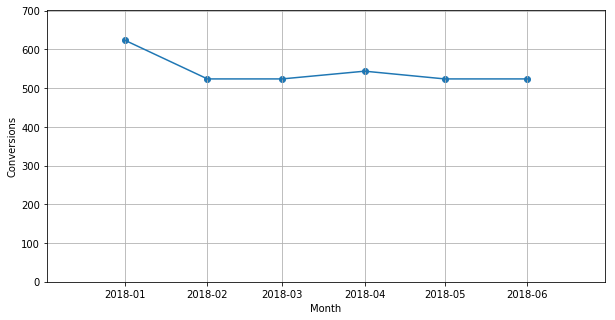

In [47]:
conversions = sum([c.conversions for c in campaigns.values()])

simple_plot(time, conversions, 'Month', 'Conversions')

## Users

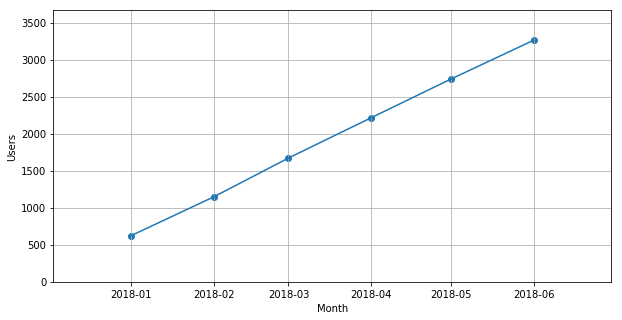

In [48]:
users = sum([c.conversions.cumsum() for c in campaigns.values()])

simple_plot(time, users, 'Month', 'Users')

# Revenue

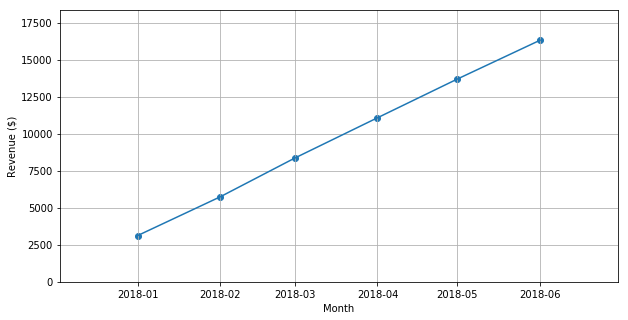

In [49]:
revenue = users * 5

simple_plot(time, revenue, 'Month', 'Revenue ($)')

# Single Game Revenue

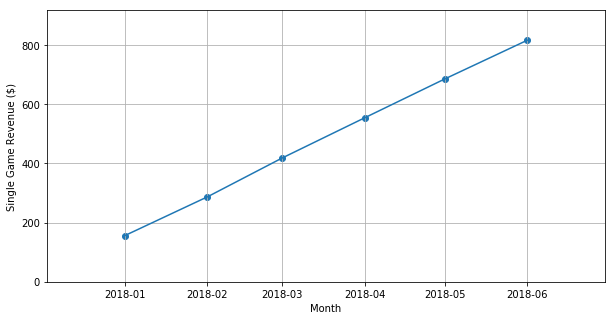

In [52]:
single_game_revenue= revenue * 0.15 / 3

simple_plot(time, single_game_revenue, 'Month', 'Single Game Revenue ($)')